In [18]:
"""
Exp04: Vol_targeting and Risk-off Gate across regimes

Goal:
- Examine how the vol_targeting interacts with risk-off gate.


Fixed:
- Asset: SPY
- Signal: MA (same as Exp02 baseline, e.g., MA=80)
# risk-off gate: 
- thresholds = 0.15   # 年化阈值 (annualized)
- lookbacks  = 10


Sweep: Risk control configuration (4 cases): 
- no_gate + no_vol_target (baseline)
- risk_off_gate only
- vol_target only
- risk_off_gate + vol_target



Evaluation:
- Annual Return
- Sharpe Ratio
- Max Drawdown
- Equity curve comparison (full sample)
- Drawdown comparison (full sample)
- Qualitative comparison of risk behavior:
    smoothness of equity curve
    depth and duration of drawdowns

"""

'\nExp04: Vol_targeting and Risk-off Gate across regimes\n\nGoal:\n- Examine how the vol_targeting interacts with risk-off gate.\n\n\nFixed:\n- Asset: SPY\n- Signal: MA (same as Exp02 baseline, e.g., MA=80)\n# risk-off gate: \n- thresholds = 0.15   # 年化阈值 (annualized)\n- lookbacks  = 10\n\n\nSweep: Risk control configuration (4 cases): \n- no_gate + no_vol_target (baseline)\n- risk_off_gate only\n- vol_target only\n- risk_off_gate + vol_target\n\n\n\nEvaluation:\n- Annual Return\n- Sharpe Ratio\n- Max Drawdown\n- Equity curve comparison (full sample)\n- Drawdown comparison (full sample)\n- Qualitative comparison of risk behavior:\n    smoothness of equity curve\n    depth and duration of drawdowns\n\n'

In [19]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from config import Config
from runner import run
from risk.risk_off_gate import risk_off_gate_vol

In [21]:
subsamples = {
    "2015-2017": ("2015-01-02", "2017-12-29"),   # post-GFC recovery / sideways
    "2018-2019": ("2018-01-02", "2019-12-31"),   # vol spikes + pre-covid
    "2020-2021": ("2020-01-02", "2021-12-31"),   # covid crash + QE bull
    "2022":      ("2022-01-03", "2022-12-30"),   # rate-hike bear
    "2023-2025": ("2023-01-03", "2025-01-03"),   # recent regime
    "full":      ("2015-01-02", "2025-01-03"),
}

In [22]:

from dataclasses import replace
import pandas as pd

# baseline config
cfg_base = replace(
    Config(),
    MA_WINDOW=80,                 # same as Exp02 baseline
    GATE_VOL_THRESHOLD_ANNUAL=0.15,
    GATE_LOOKBACK=10,
)

# 4 risk-control cases
risk_control_case = [
    ("none", False),        # baseline
    ("vol_target", False),  # vol-target only
    ("none", True),         # gate only
    ("vol_target", True),   # gate + vol-target
]

rows = []

for name, (start, end) in subsamples.items():
    cfg_regime = replace(cfg_base, START=start, END=end)

    for risk_mode, use_risk_off_gate in risk_control_case:
        cfg_tmp = replace(
            cfg_regime,
            RISK_MODE=risk_mode,
            USE_RISK_OFF_GATE=use_risk_off_gate,
        )

        _, s = run(cfg_tmp)

        s["subsample"] = name
        s["START"] = start
        s["END"] = end
        s["MA_WINDOW"] = cfg_tmp.MA_WINDOW
        s["RISK_MODE"] = risk_mode
        s["USE_RISK_OFF_GATE"] = use_risk_off_gate

        rows.append(s)

exp04 = pd.DataFrame(rows)
exp04


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,subsample,START,END,MA_WINDOW,RISK_MODE,USE_RISK_OFF_GATE
0,0.066957,-0.118435,0.806350,26.000000,675,2015-2017,2015-01-02,2017-12-29,80,none,False
1,0.061826,-0.117625,0.762744,26.156534,675,2015-2017,2015-01-02,2017-12-29,80,vol_target,False
2,0.064238,-0.110395,0.843016,28.000000,675,2015-2017,2015-01-02,2017-12-29,80,none,True
3,0.061808,-0.110622,0.817422,27.873124,675,2015-2017,2015-01-02,2017-12-29,80,vol_target,True
4,0.040937,-0.149217,0.497173,21.000000,423,2018-2019,2018-01-02,2019-12-31,80,none,False
5,0.045745,-0.136242,0.566544,19.364682,423,2018-2019,2018-01-02,2019-12-31,80,vol_target,False
6,0.082436,-0.076632,1.062824,9.000000,423,2018-2019,2018-01-02,2019-12-31,80,none,True
7,0.079621,-0.078745,1.031592,9.013288,423,2018-2019,2018-01-02,2019-12-31,80,vol_target,True
8,0.255804,-0.102789,1.618033,13.000000,425,2020-2021,2020-01-02,2021-12-31,80,none,False
9,0.205433,-0.097166,1.541087,14.442292,425,2020-2021,2020-01-02,2021-12-31,80,vol_target,False


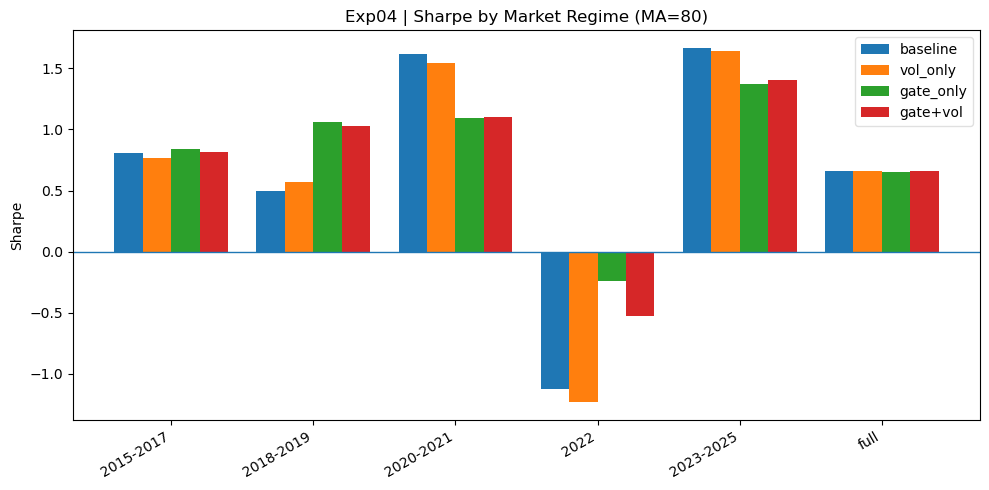

In [23]:
### Sharpe by regime（4 cases）

import numpy as np
import matplotlib.pyplot as plt

order = ["2015-2017", "2018-2019", "2020-2021", "2022", "2023-2025", "full"]

df = exp04.copy()
df["subsample"] = pd.Categorical(df["subsample"], categories=order, ordered=True)

# 组合成 4 个 case label
def case_label(r):
    if r["RISK_MODE"] == "none" and (not r["USE_RISK_OFF_GATE"]):
        return "baseline"
    if r["RISK_MODE"] == "vol_target" and (not r["USE_RISK_OFF_GATE"]):
        return "vol_only"
    if r["RISK_MODE"] == "none" and r["USE_RISK_OFF_GATE"]:
        return "gate_only"
    if r["RISK_MODE"] == "vol_target" and r["USE_RISK_OFF_GATE"]:
        return "gate+vol"
    return "other"

df["case"] = df.apply(case_label, axis=1)

metric = "Sharpe"   # 想画 MDD 就改成 "Max Drawdown"；想画收益就改 "Annual Return"

pivot = df.pivot(index="subsample", columns="case", values=metric).sort_index()

x = np.arange(len(pivot.index))
width = 0.2  # 4根柱子

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - 1.5*width, pivot["baseline"],  width, label="baseline")
ax.bar(x - 0.5*width, pivot["vol_only"],  width, label="vol_only")
ax.bar(x + 0.5*width, pivot["gate_only"], width, label="gate_only")
ax.bar(x + 1.5*width, pivot["gate+vol"],  width, label="gate+vol")

ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=30, ha="right")
ax.set_ylabel(metric)
ax.set_title(f"Exp04 | {metric} by Market Regime (MA=80)")
ax.axhline(0, linewidth=1)

ax.legend(framealpha=0.6)
plt.tight_layout()
plt.show()


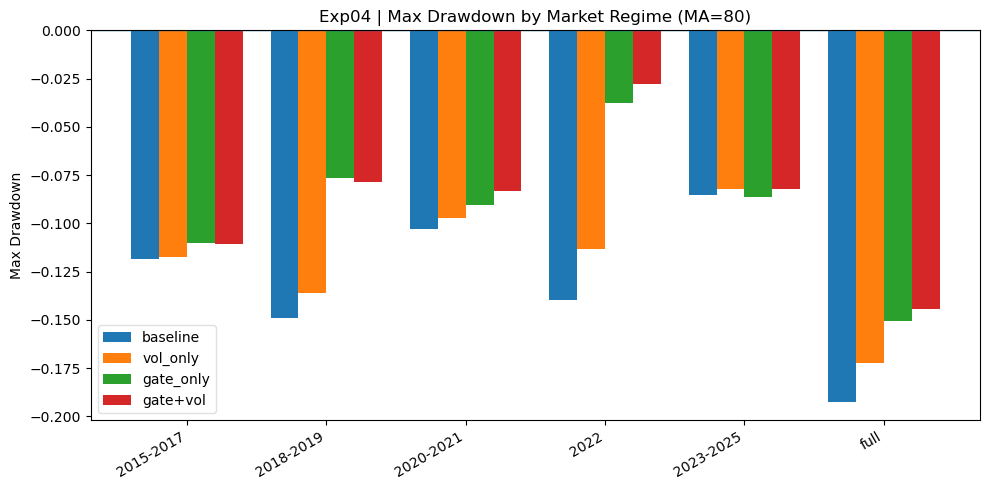

In [24]:
### Max Drawdown by regime（4 cases）

import numpy as np
import matplotlib.pyplot as plt

order = ["2015-2017", "2018-2019", "2020-2021", "2022", "2023-2025", "full"]

df = exp04.copy()
df["subsample"] = pd.Categorical(df["subsample"], categories=order, ordered=True)

# 组合成 4 个 case label
def case_label(r):
    if r["RISK_MODE"] == "none" and (not r["USE_RISK_OFF_GATE"]):
        return "baseline"
    if r["RISK_MODE"] == "vol_target" and (not r["USE_RISK_OFF_GATE"]):
        return "vol_only"
    if r["RISK_MODE"] == "none" and r["USE_RISK_OFF_GATE"]:
        return "gate_only"
    if r["RISK_MODE"] == "vol_target" and r["USE_RISK_OFF_GATE"]:
        return "gate+vol"
    return "other"

df["case"] = df.apply(case_label, axis=1)

metric = "Max Drawdown"   # 想画 MDD 就改成 "Max Drawdown"；想画收益就改 "Annual Return"

pivot = df.pivot(index="subsample", columns="case", values=metric).sort_index()

x = np.arange(len(pivot.index))
width = 0.2  # 4根柱子

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - 1.5*width, pivot["baseline"],  width, label="baseline")
ax.bar(x - 0.5*width, pivot["vol_only"],  width, label="vol_only")
ax.bar(x + 0.5*width, pivot["gate_only"], width, label="gate_only")
ax.bar(x + 1.5*width, pivot["gate+vol"],  width, label="gate+vol")

ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=30, ha="right")
ax.set_ylabel(metric)
ax.set_title(f"Exp04 | {metric} by Market Regime (MA=80)")
ax.axhline(0, linewidth=1)

ax.legend(framealpha=0.6)
plt.tight_layout()
plt.show()


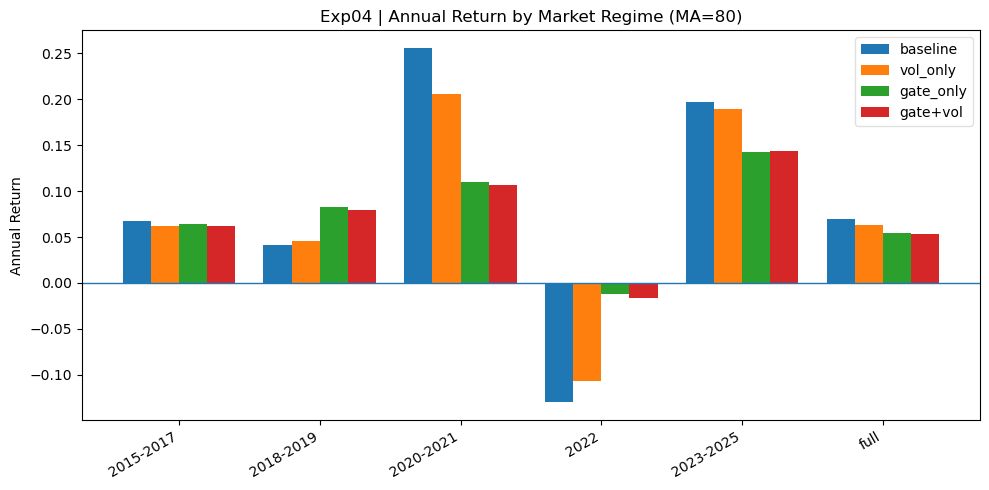

In [25]:
### Annual Return by regime（4 cases）

import numpy as np
import matplotlib.pyplot as plt

order = ["2015-2017", "2018-2019", "2020-2021", "2022", "2023-2025", "full"]

df = exp04.copy()
df["subsample"] = pd.Categorical(df["subsample"], categories=order, ordered=True)

# 组合成 4 个 case label
def case_label(r):
    if r["RISK_MODE"] == "none" and (not r["USE_RISK_OFF_GATE"]):
        return "baseline"
    if r["RISK_MODE"] == "vol_target" and (not r["USE_RISK_OFF_GATE"]):
        return "vol_only"
    if r["RISK_MODE"] == "none" and r["USE_RISK_OFF_GATE"]:
        return "gate_only"
    if r["RISK_MODE"] == "vol_target" and r["USE_RISK_OFF_GATE"]:
        return "gate+vol"
    return "other"

df["case"] = df.apply(case_label, axis=1)

metric = "Annual Return"   # 想画 MDD 就改成 "Max Drawdown"；想画收益就改 "Annual Return"

pivot = df.pivot(index="subsample", columns="case", values=metric).sort_index()

x = np.arange(len(pivot.index))
width = 0.2  # 4根柱子

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - 1.5*width, pivot["baseline"],  width, label="baseline")
ax.bar(x - 0.5*width, pivot["vol_only"],  width, label="vol_only")
ax.bar(x + 0.5*width, pivot["gate_only"], width, label="gate_only")
ax.bar(x + 1.5*width, pivot["gate+vol"],  width, label="gate+vol")

ax.set_xticks(x)
ax.set_xticklabels(pivot.index, rotation=30, ha="right")
ax.set_ylabel(metric)
ax.set_title(f"Exp04 | {metric} by Market Regime (MA=80)")
ax.axhline(0, linewidth=1)

ax.legend(framealpha=0.6)
plt.tight_layout()
plt.show()
